# 🧪 Übung 1 – Bildverarbeitung

### 👨‍💻 Bearbeiter
- **Dominik Müller**
- **Pascal Kaimer**
- **Phillipe Zimmermann**

---

## 🖼️ Teil 1 – Farbbilder und Spiegelung



In [1]:
#imports

from types import new_class
import matplotlib
from skimage import io
import numpy as np
import matplotlib.pyplot as plt


def plot_img(img, bw=False):
    if bw:
        plt.imshow(img, cmap='gray', vmin=0, vmax=255)
        plt.axis('off')
        plt.show()
    else:
        plt.imshow(img)
        plt.axis('off')
        plt.show()


def plot_hist(hist):
    plt.figure(figsize=(16, 9))
    plt.bar(list(range(256)), hist, width=1)
    plt.show()

[[[30 31 35]
  [30 31 35]
  [30 31 35]
  ...
  [30 31 35]
  [30 31 35]
  [30 31 35]]

 [[30 31 35]
  [30 31 35]
  [30 31 35]
  ...
  [30 31 35]
  [30 31 35]
  [30 31 35]]

 [[30 31 35]
  [30 31 35]
  [30 31 35]
  ...
  [30 31 35]
  [30 31 35]
  [30 31 35]]

 ...

 [[28 32 35]
  [28 32 35]
  [28 32 35]
  ...
  [30 31 35]
  [30 31 35]
  [30 31 35]]

 [[28 32 35]
  [28 32 35]
  [28 32 35]
  ...
  [30 31 35]
  [30 31 35]
  [30 31 35]]

 [[30 31 35]
  [30 31 35]
  [30 31 35]
  ...
  [30 31 35]
  [30 31 35]
  [30 31 35]]]
(237, 439, 3)
<class 'numpy.ndarray'>


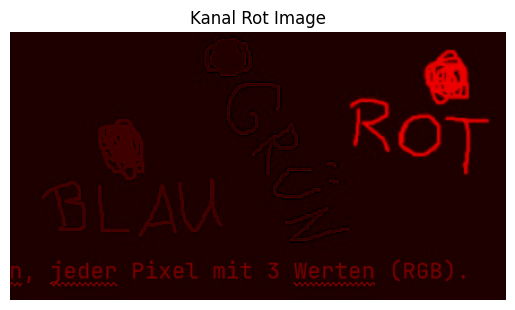

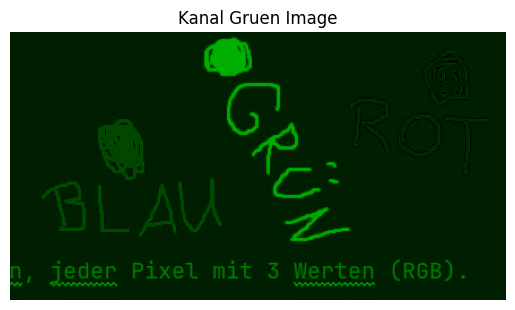

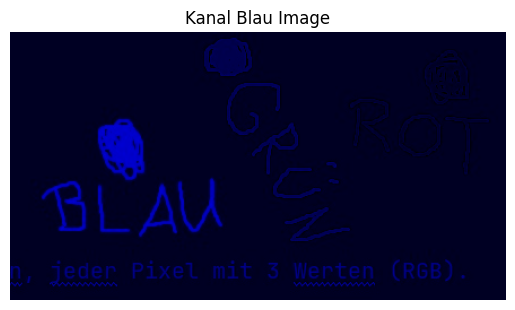

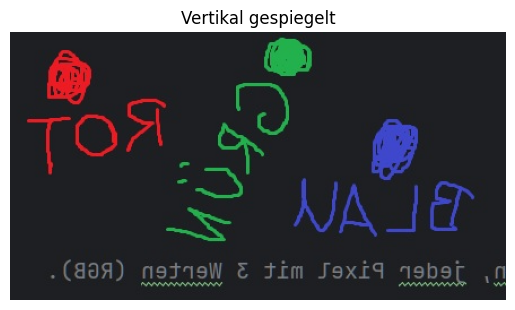

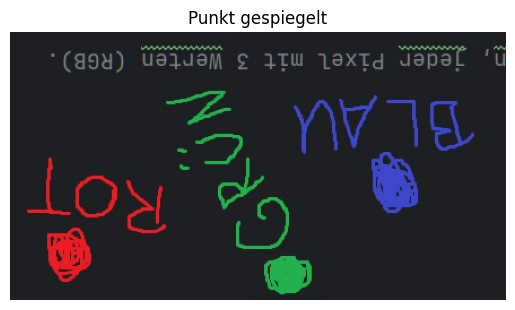

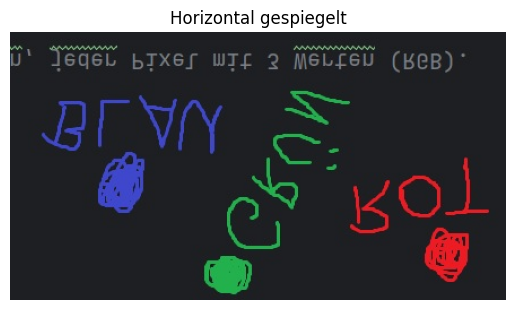

In [2]:
# AUFGABE 1
# Bild laden und anzeigen.
image_path = "Images/BlauGruenRot.jpg"
image1 = io.imread(image_path)

#plt.imshow(image)
#plt.axis('off')
#plt.show()

# Datentyp des Bildes untersuchen
print(image1)
print(image1.shape)
print(type(image1))
# Ergebnis: 600 Zeilen mal 600 Spalten, jeder Pixel mit 3 Werten (RGB).

# Farbkanäle einzeln anzeigen
kanalRot = np.array([np.array([np.array([y[0], 0, 0]) for y in x]) for x in image1])
plt.imshow(kanalRot)
plt.title("Kanal Rot Image")
plt.axis('off')
plt.show()

kanalGruen = np.array([np.array([np.array([0, y[1], 0]) for y in x]) for x in image1])
plt.imshow(kanalGruen)
plt.title("Kanal Gruen Image")
plt.axis('off')
plt.show()

kanalBlau = np.array([np.array([np.array([0, 0, y[2]]) for y in x]) for x in image1])
plt.imshow(kanalBlau)
plt.title("Kanal Blau Image")
plt.axis('off')
plt.show()


# Spiegelfunktion (wahlweise Zeilen, oder Spalten umsortieren)
def mirror(image, isVertical=True):
    if isVertical:
        return image[:, ::-1]
    else:
        return image[::-1]


verticalTest = mirror(image1)
plt.imshow(verticalTest)
plt.title("Vertikal gespiegelt")
plt.axis('off')
plt.show()

pointReflection = mirror(mirror(image1), False)
plt.imshow(pointReflection)
plt.title('Punkt gespiegelt')
plt.axis('off')
plt.show()

horizontalTest = mirror(image1, False)
plt.imshow(horizontalTest)
plt.title('Horizontal gespiegelt')
plt.axis('off')
plt.show()


---

## Teil 2 - **Histogramme, Binning und Lookup-Tabellen**

### 2.3. Funktion, die ein Histogram eines 8 Bit Graustufenbildes berechnet

In [3]:


def grayscale(imge_rgb):
    bw_img = []
    for row in imge_rgb:
        new_row = []
        for pixel in row:
            avg = sum([int(x) for x in pixel]) // 3
            new_row.append(avg)
        bw_img.append(np.array(new_row, dtype="uint8"))
    return np.array(bw_img)


def bw_histogram(img, norm=False):
    hist = [0] * 256
    for row in img:
        for px in row:
            hist[px] += 1

    if norm:
        all = len(img) * len(img[0])
        for i in range(len(hist)):
            hist[i] /= all

    return np.array(hist)

### 4) Berechnung der Histogramme der Bilder 01 - 05

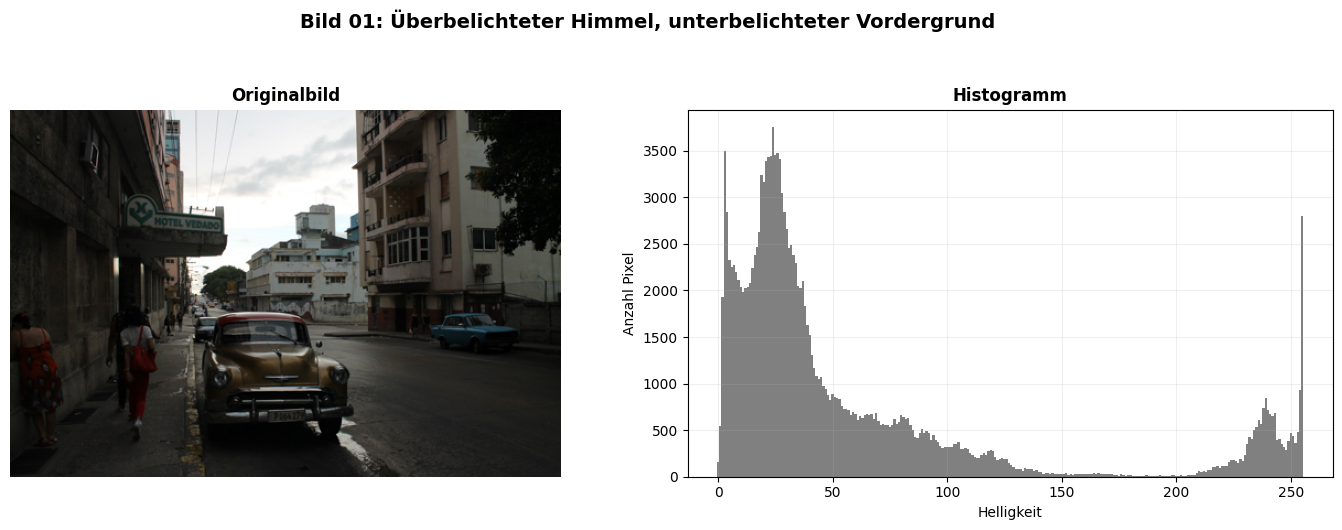

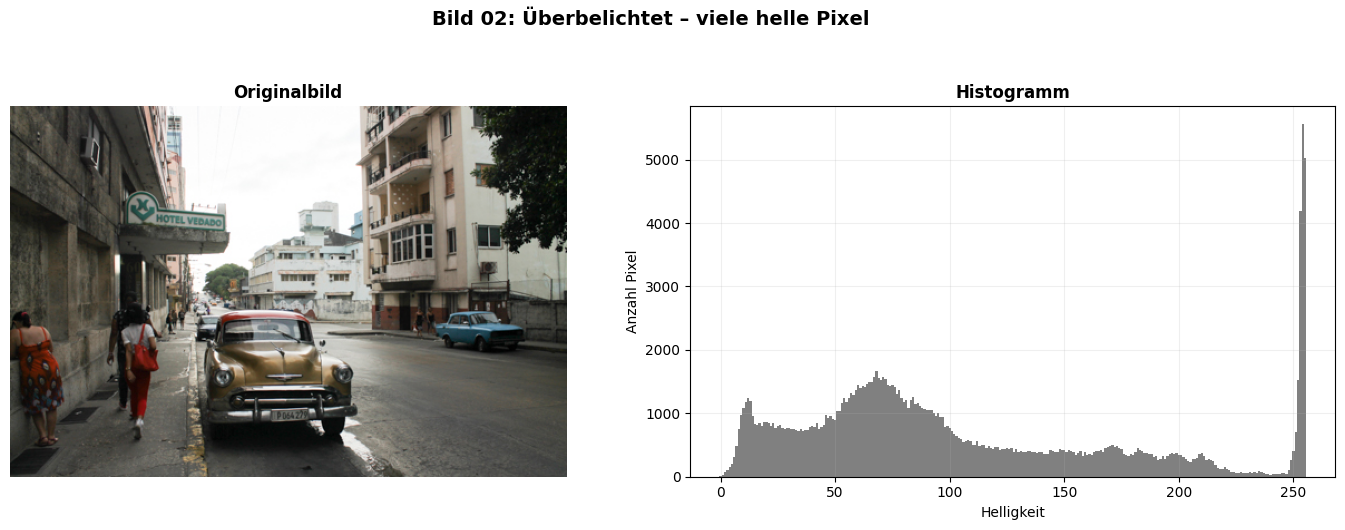

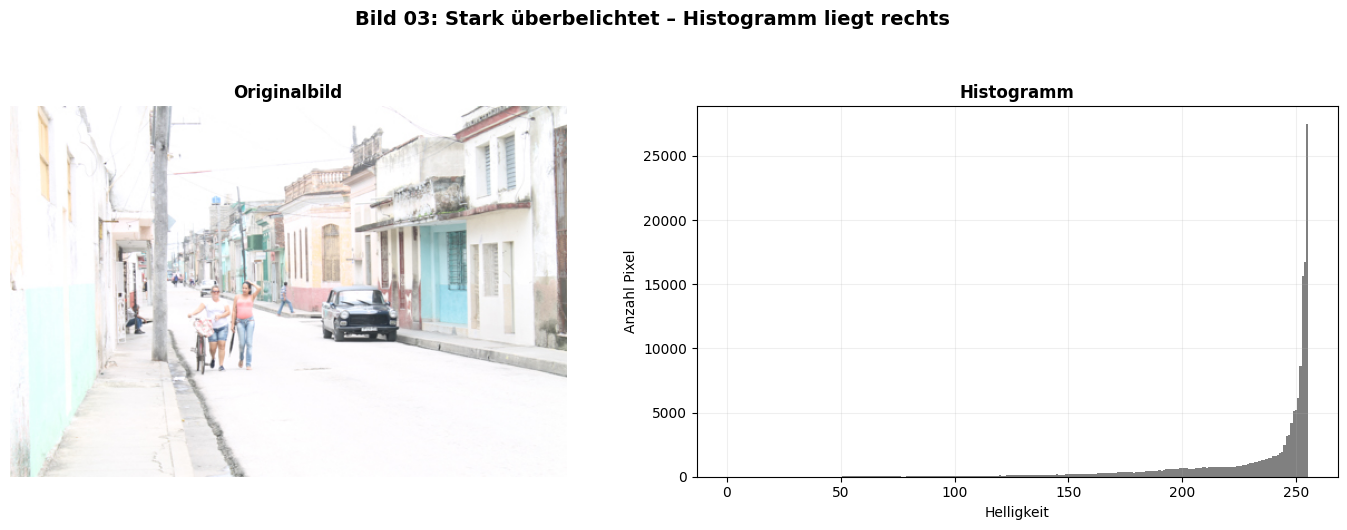

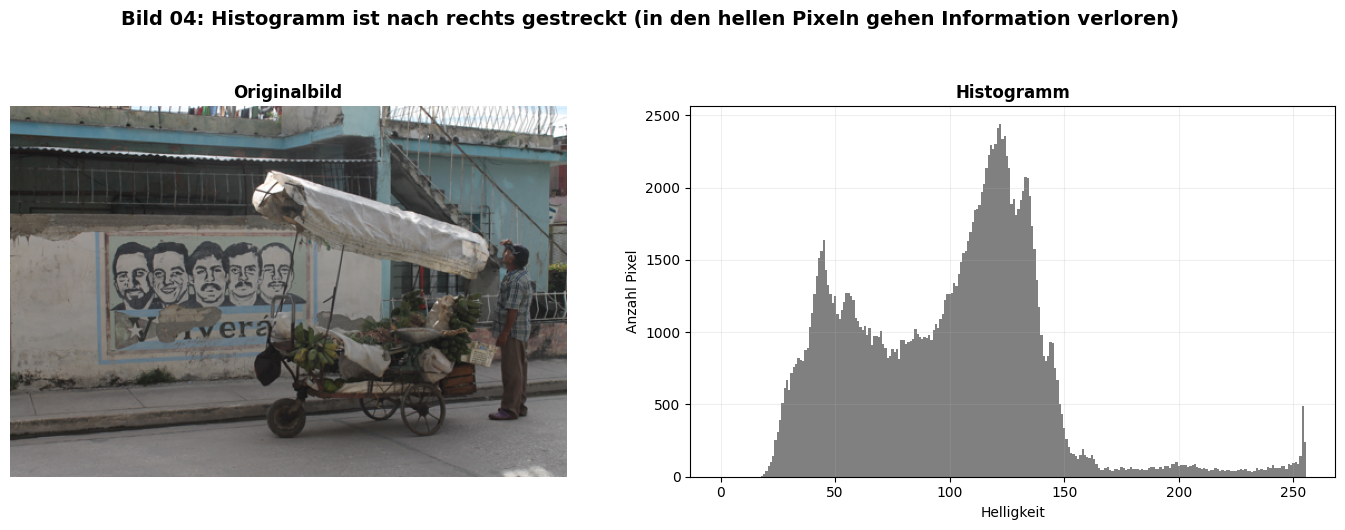

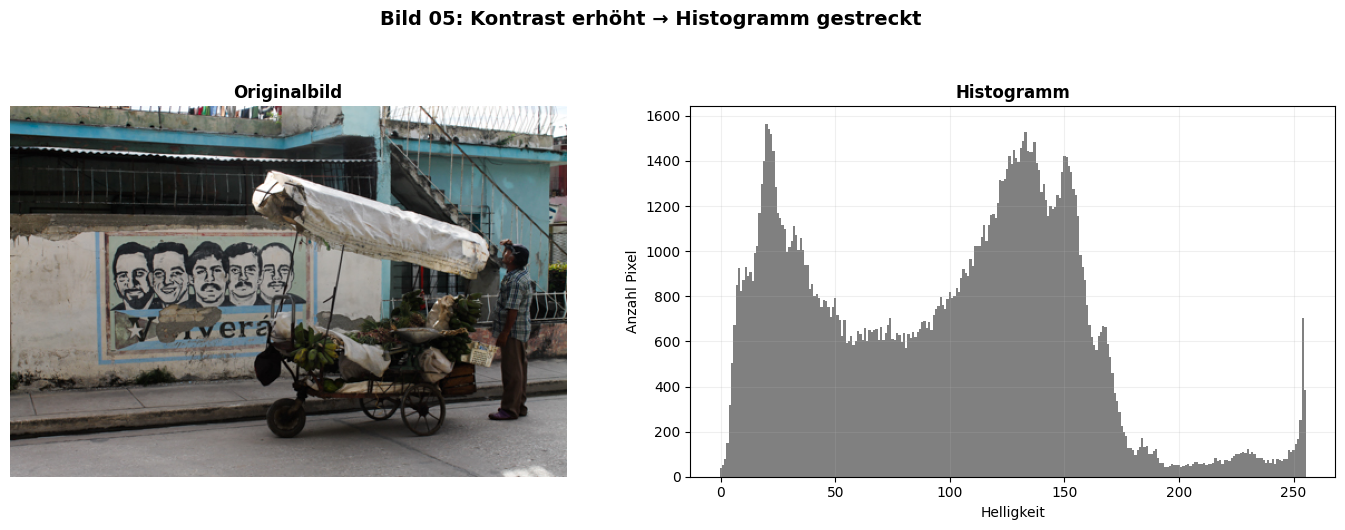

In [4]:
'''
bw_test = grayscale(image1)
plt.imshow(bw_test, cmap='gray')
plt.axis('off')
plt.show()

plt.plot(bw_histogram(bw_test, True))
plt.show()
'''
# 4 a) Welche Aufnahmefehler sind in 01 und 03 zu erkennen? Woran ist dies im Histogramm erkennbar?

# Bild 1 (überbelichtet Himmel) und unterbelichtet

# Bild 2 überbelichtet

# Bild 3 stark überbelichtet

# b) das Histogramm wurde nach rechts gestreckt (in den hellen Pixeln geht Information verloren)

# c) der Kontrast wurde erhöht -> Historgramm gestreckt

'''
for i in range(1, 6):
    image_path = f"Images/bild0{i}.jpg"
    print(image_path)
    image1 = io.imread(image_path)
    img = io.imread(image_path)
    img_bw = grayscale(img)

    hist = bw_histogram(img_bw)
    plt.figure(figsize=(16, 9))
    plt.bar(list(range(256)), hist, width=1)
    plt.show()
   '''

def fancy_histogram_plot(image_path, description):
    img = io.imread(image_path)
    img_bw = grayscale(img)
    hist = bw_histogram(img_bw)

    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    # Bild anzeigen
    axs[0].imshow(img)
    axs[0].axis('off')
    axs[0].set_title("Originalbild", fontsize=12, weight='bold')

    # Histogramm anzeigen
    axs[1].bar(range(256), hist, width=1, color='gray')
    axs[1].set_title("Histogramm", fontsize=12, weight='bold')
    axs[1].set_xlabel("Helligkeit")
    axs[1].set_ylabel("Anzahl Pixel")
    axs[1].grid(alpha=0.2)

    # Beschreibung über Plot
    fig.suptitle(description, fontsize=14, weight='bold', y=1.05)
    plt.tight_layout()
    plt.show()

descriptions = {
    1: "Bild 01: Überbelichteter Himmel, unterbelichteter Vordergrund",
    2: "Bild 02: Überbelichtet – viele helle Pixel",
    3: "Bild 03: Stark überbelichtet – Histogramm liegt rechts",
    4: "Bild 04: Histogramm ist nach rechts gestreckt (in den hellen Pixeln gehen Information verloren)",
    5: "Bild 05: Kontrast erhöht → Histogramm gestreckt"
}

for i in range(1, 6):
    path = f"Images/bild0{i}.jpg"
    fancy_histogram_plot(path, descriptions[i])



### 5) Punktoperation mithilfe einer Lookup-Table

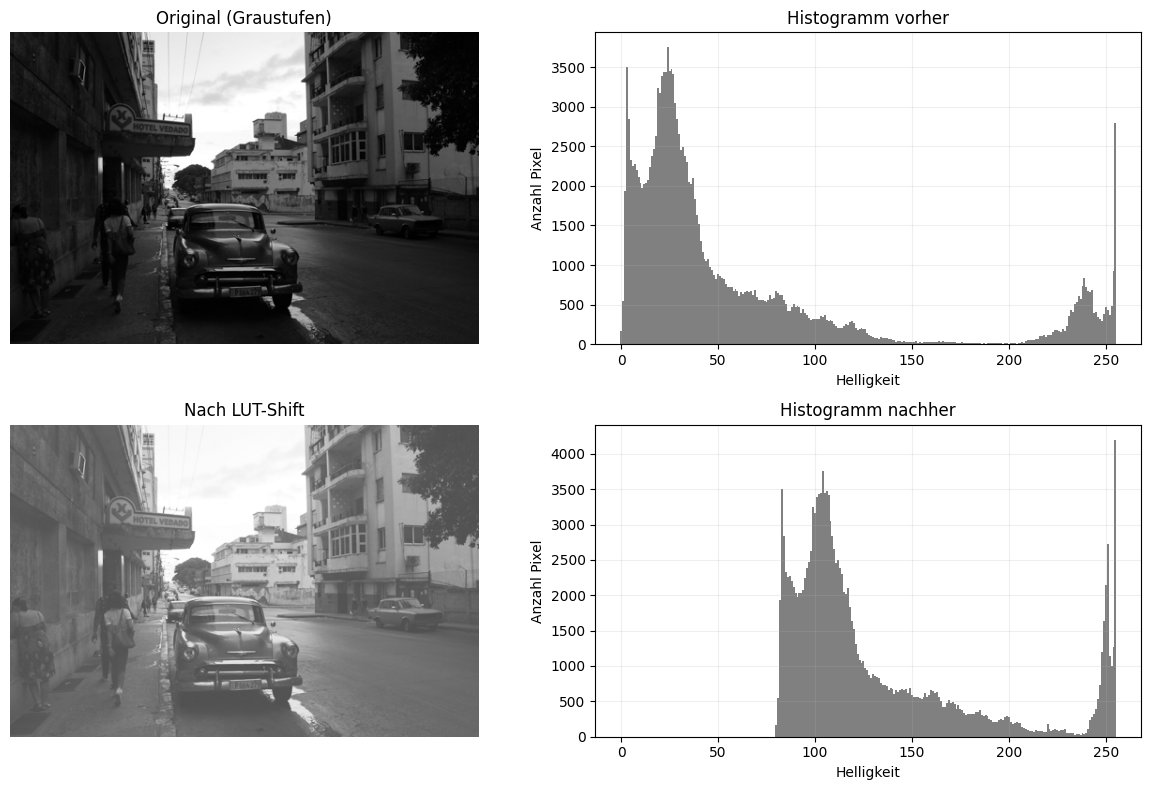

[[109,
  105,
  103,
  102,
  113,
  115,
  114,
  114,
  112,
  105,
  99,
  102,
  103,
  108,
  108,
  111,
  106,
  108,
  105,
  107,
  110,
  109,
  104,
  101,
  100,
  94,
  97,
  101,
  96,
  99,
  97,
  102,
  103,
  92,
  92,
  97,
  104,
  107,
  109,
  110,
  105,
  103,
  103,
  102,
  98,
  104,
  100,
  98,
  94,
  91,
  90,
  94,
  103,
  104,
  100,
  100,
  100,
  103,
  104,
  104,
  104,
  100,
  98,
  94,
  96,
  97,
  98,
  99,
  97,
  98,
  97,
  92,
  91,
  101,
  101,
  101,
  102,
  103,
  101,
  100,
  99,
  99,
  98,
  96,
  95,
  94,
  94,
  94,
  96,
  98,
  98,
  99,
  100,
  101,
  100,
  100,
  101,
  101,
  101,
  102,
  102,
  102,
  102,
  102,
  102,
  102,
  103,
  103,
  103,
  103,
  102,
  98,
  98,
  100,
  117,
  138,
  106,
  100,
  120,
  124,
  179,
  172,
  177,
  170,
  144,
  95,
  135,
  130,
  109,
  168,
  151,
  192,
  146,
  209,
  220,
  210,
  169,
  223,
  197,
  221,
  224,
  243,
  249,
  232,
  232,
  236,
  241,
  248,
  241

In [5]:
def apply(lut, img):
    res = []
    for i in range(len(img)):
        row = []
        for j in range(len(img[0])):
            row.append(lut[int(img[i][j])])
        res.append(row)
    return res


def gamma(img):
    K = 256
    aMax = K - 1
    GAMMA = 2.8

    lut = [0] * K
    for a in range(K):
        aa = a / aMax
        bb = pow(aa, GAMMA)
        b = round(bb * aMax)
        lut[a] = b

    return apply(lut, img)


def brightness_lut(img, lvl):
    lut = list(range(lvl, 256 + lvl))
    lut = [x if x <= 255 else 255 for x in lut]
    return apply(lut, img)


"""
image_path = "Images\\bild04.jpg"
image1 = io.imread(image_path)
plot_img(image1, True)
testGamma = brightness_lut(grayscale(image1), 100)
plot_img(testGamma, True)
"""


# 5 a)

def lossless_brightness_bw(bw_img):
    dist = 0
    hist = bw_histogram(bw_img)
    for i in range(255, -1, -1):
        if hist[i] == 0:
            dist += 1
        else:
            break
    return brightness_lut(bw_img, dist)


"""
image_path = "Images\\bild01.jpg"
image1 = io.imread(image_path)
bw_img = grayscale(image1)
hist1 = bw_histogram(bw_img)
plot_img(bw_img, True)
plot_hist(hist1)

lbimg = lossless_brightness_bw(bw_img)
hist2 = bw_histogram(lbimg)
plot_img(lbimg, True)
plot_hist(hist2)
"""


def bild1_hell_kontrast():
    low40 = []
    mid90 = []
    midhigh90 = []
    high36 = []
    for i in range(60):
        low40.append(i * 2)
    for i in range(60, 130):
        mid90.append(i + 60)
    for i in range(130, 220):
        midhigh90.append(((i - 130) // 3) + 60 + 130)
    for i in range(220, 256):
        high36.append(i)
    lut = low40 + mid90 + midhigh90 + high36

    image_path = "Images/bild01.jpg"
    image1 = io.imread(image_path)

    img1_bw = grayscale(image1)
    hist = bw_histogram(img1_bw)
    plot_hist(hist)
    res = apply(lut, img1_bw)

    res_hist = bw_histogram(res)
    plot_img(res, True)
    plot_hist(res_hist)


def bild1_hell_shift():
    low140 = []
    high116 = []
    for i in range(140):
        low140.append(i + 80)
    for i in range(140, 256):
        high116.append(int(220 + 36 * ((i - 140) / 116)))
    lut = low140 + high116

    image_path = "Images/bild01.jpg"
    image1 = io.imread(image_path)

    img1_bw = grayscale(image1)
    hist = bw_histogram(img1_bw)
    plot_hist(hist)
    res = apply(lut, img1_bw)
    res_hist = bw_histogram(res)
    plot_img(res, True)
    plot_hist(res_hist)

def bild1_hell_shift_pretty():
    low140 = [i + 80 for i in range(140)]
    high116 = [int(220 + 36 * ((i - 140) / 116)) for i in range(140, 256)]
    lut = low140 + high116

    image_path = "Images/bild01.jpg"
    image1 = io.imread(image_path)
    img1_bw = grayscale(image1)

    # Vorher Histogramm
    hist_before = bw_histogram(img1_bw)

    # LUT anwenden
    img_shifted = apply(lut, img1_bw)
    hist_after = bw_histogram(img_shifted)

    # Plot: Bild & Histogramm Vorher/Nachher
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    axs[0, 0].imshow(img1_bw, cmap='gray', vmin=0, vmax=255)
    axs[0, 0].axis('off')
    axs[0, 0].set_title("Original (Graustufen)")

    axs[0, 1].bar(range(256), hist_before, width=1, color='gray')
    axs[0, 1].set_title("Histogramm vorher")
    axs[0, 1].set_xlabel("Helligkeit")
    axs[0, 1].set_ylabel("Anzahl Pixel")
    axs[0, 1].grid(alpha=0.2)

    axs[1, 0].imshow(img_shifted, cmap='gray', vmin=0, vmax=255)
    axs[1, 0].axis('off')
    axs[1, 0].set_title("Nach LUT-Shift")

    axs[1, 1].bar(range(256), hist_after, width=1, color='gray')
    axs[1, 1].set_title("Histogramm nachher")
    axs[1, 1].set_xlabel("Helligkeit")
    axs[1, 1].set_ylabel("Anzahl Pixel")
    axs[1, 1].grid(alpha=0.2)

    plt.tight_layout()
    plt.show()

    return img_shifted


#bild1_hell_kontrast()
#bild1_hell_shift()
bild1_hell_shift_pretty()